In [8]:
pip install git 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


In [9]:
pip install git+https://github.com/shivani485/internship_genzel_lab.git

  Cloning https://github.com/shivani485/internship_genzel_lab.git to c:\users\lenovo\appdata\local\temp\pip-req-build-twdksu4x
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/shivani485/internship_genzel_lab.git 'C:\Users\LENOVO\AppData\Local\Temp\pip-req-build-twdksu4x'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/shivani485/internship_genzel_lab.git 'C:\Users\LENOVO\AppData\Local\Temp\pip-req-build-twdksu4x'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [17]:
%reload_ext autoreload
%autoreload 2

In [27]:
from signal import signal
from matplotlib.offsetbox import HPacker
import scipy
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from spectral_connectivity import Multitaper
from spectral_connectivity import Connectivity
from spectral_connectivity import multitaper_connectivity
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
pathsHPC = [path for path in Path('C:/Users/LENOVO/Desktop/sem7/internship/HomeCageHC').resolve().glob("**/*HPC*.mat")] # works (all full paths to HPC files)
pathsPFC = [path for path in Path('C:/Users/LENOVO/Desktop/sem7/internship/HomeCageHC').resolve().glob("**/*PFC*.mat")] # works (all full paths to PFC files)


sampling_frequency = 1000
n_trials = len(pathsHPC)
time_halfbandwidth_product = 5
frequency_of_interest = list(range(10,30))

# dataHPC = scipy.io.loadmat(pathsHPC[0])
# dataPFC = scipy.io.loadmat(pathsPFC[0])

# HPC=np.zeros(300000*39).reshape(300000,39)
# PFC=np.zeros(300000*39).reshape(300000,39)

In [29]:
HPC=np.zeros(300000*39).reshape(300000,39)
PFC=np.zeros(300000*39).reshape(300000,39)

for i in range(n_trials-1): 
    dataHPC = scipy.io.loadmat(pathsHPC[i])
    dataPFC = scipy.io.loadmat(pathsPFC[i])
   
    current_dataHPC = dataHPC['HPC']
    current_dataPFC = dataPFC['PFC']
    current_dataHPC=current_dataHPC[0:300000]
    current_dataPFC=current_dataPFC[0:300000]
    n_time_samples = len(current_dataHPC)
    # print(n_time_samples)
    
    if n_time_samples == 300000:
        time = np.arange(0, n_time_samples)/sampling_frequency
        signal1 = np.zeros(n_time_samples)
        signal2 = np.zeros(n_time_samples)
        signal1 = current_dataHPC
        signal2 = current_dataPFC
        HPC[:,i,np.newaxis] = signal1
        PFC[:,i,np.newaxis] = signal2
      
signals = np.stack((HPC, PFC), axis=-1)
print(signals.shape)

m = Multitaper(
signals,
sampling_frequency=sampling_frequency,
time_halfbandwidth_product=time_halfbandwidth_product,
start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

delay, slope, r_value= c.group_delay(
frequencies_of_interest=list(range(2,10)), frequency_resolution=m.frequency_resolution
)
print(delay)

(300000, 39, 2)
[[[ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [ True]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [F

In [21]:
print(delay.shape)

(1, 2, 2)


In [28]:
HPC=np.zeros(300000)
PFC=np.zeros(300000)

dataHPC = scipy.io.loadmat(pathsHPC[0])
dataPFC = scipy.io.loadmat(pathsPFC[0])

current_dataHPC = dataHPC['HPC']
current_dataPFC = dataPFC['PFC']
current_dataHPC=current_dataHPC[0:300000]
current_dataPFC=current_dataPFC[0:300000]
n_time_samples = len(current_dataHPC)

time = np.arange(0, n_time_samples)/sampling_frequency
signal1 = np.zeros(n_time_samples)
signal2 = np.zeros(n_time_samples)
signal1 = current_dataHPC
signal2 = current_dataPFC
HPC[:,np.newaxis] = signal1
PFC[:,np.newaxis] = signal2

signals = np.stack((HPC, PFC), axis=-1)
# signals = signals.reshape(300000,1,2)

print(signals.shape)

m = Multitaper(
signals,
sampling_frequency=sampling_frequency,
time_halfbandwidth_product=time_halfbandwidth_product,
start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

delay, slope, r_value= c.group_delay(
frequencies_of_interest=list(range(2,10)), frequency_resolution=m.frequency_resolution
)
print(delay)

(300000, 2)
[[[False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False]
  [False

In [20]:
help(c.group_delay)

Help on method group_delay in module spectral_connectivity.connectivity:

group_delay(frequencies_of_interest=None, frequency_resolution=None, significance_threshold=0.05) method of spectral_connectivity.connectivity.Connectivity instance
    The average time-delay of a broadband signal.
    
    Parameters
    ----------
    frequencies_of_interest : array-like, shape (2,)
    frequencies : array-like, shape (n_fft_samples,)
    frequency_resolution : float
    
    Returns
    -------
    delay : array, shape (..., n_signals, n_signals)
    slope : array, shape (..., n_signals, n_signals)
    r_value : array, shape (..., n_signals, n_signals)
    
    References
    ----------
    .. [1] Gotman, J. (1983). Measurement of small time differences
           between EEG channels: method and application to epileptic
           seizure propagation. Electroencephalography and Clinical
           Neurophysiology 56, 501-514.



In [ ]:
def multitaper():
    m = Multitaper(
    signals,
    sampling_frequency=sampling_frequency,
    time_halfbandwidth_product=time_halfbandwidth_product,
    start_time=time[0],
    )
    c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)
    return c

<BarContainer object of 2 artists>

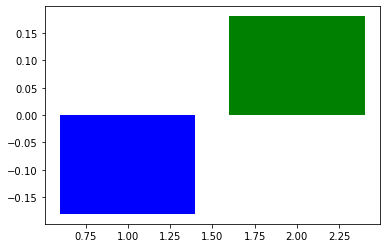

In [6]:
plt.bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)

(300000, 39)
(300000, 39, 2)
[[[        nan  0.02795212]
  [-0.02795212         nan]]]


<BarContainer object of 2 artists>

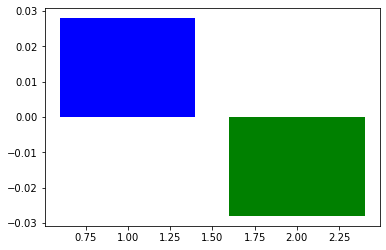

In [22]:
print(HPC.shape)

signals = np.stack((HPC, PFC), axis=-1)

print(signals.shape)

m = Multitaper(
signals,
sampling_frequency=sampling_frequency,
time_halfbandwidth_product=time_halfbandwidth_product,
start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

delay, slope, r_value = c.group_delay(
frequencies_of_interest=list(range(2,10)), frequency_resolution=m.frequency_resolution
)
print(delay)

plt.bar(
    [1, 2], [delay[..., 0, 1].squeeze(), delay[..., 1, 0].squeeze()], color=["b", "g"]
)

In [11]:
#phase slope index

<BarContainer object of 2 artists>

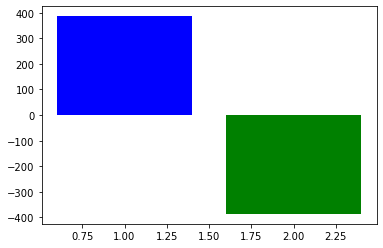

In [12]:
psi = c.phase_slope_index(
    frequencies_of_interest=[2, 10], frequency_resolution=m.frequency_resolution
)
plt.bar(
    [1, 2], [psi[..., 0, 1].squeeze(), psi[..., 1, 0].squeeze()], color=["b", "g"])

In [13]:
print(psi)

[[[          nan  386.07261693]
  [-386.07261693           nan]]]


ValueError: ['b', 'g'] is not a valid value for color

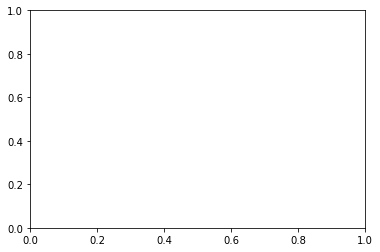

In [14]:
dataHPC = scipy.io.loadmat(pathsHPC[0])
dataPFC = scipy.io.loadmat(pathsPFC[0])

current_dataHPC = dataHPC['HPC']
current_dataPFC = dataPFC['PFC']


n_time_samples = len(current_dataHPC)
time = np.arange(0, n_time_samples)/sampling_frequency 
signal = np.zeros((n_time_samples, 2))
signal[:, 0] = np.reshape(current_dataHPC, (n_time_samples,))
signal[:, 1] = np.reshape(current_dataPFC, (n_time_samples,))

m = Multitaper(
signal,
sampling_frequency=sampling_frequency,
time_halfbandwidth_product=time_halfbandwidth_product,
start_time=time[0],
)
c = Connectivity(fourier_coefficients=m.fft(), frequencies=m.frequencies, time=m.time)

plt.plot(c.frequencies, c.power().squeeze(), color = ["b", "g"])
#plt.xlim((0,90))